**Лабораторная работа №3
Геометрические преобразования изображений**

**Цель работы:** Освоение основных видов отображений и использование геометрических преобразований для решения задач пространственной коррекции изображений.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

**1. Простейшие геометрические преобразования. Выбрать произвольное изображение. Выполнить над ним линейные и нелинейные преобразования (конформные, аффинные и проективные отображения).**

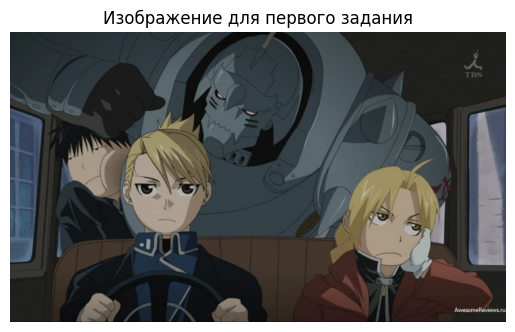

In [2]:
I = cv2.imread("alch.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.title('Изображение для первого задания')
plt.axis('off')
plt.show()

Конформное отображение — это отображение, при котором сохраняется форма бесконечно малых фигур и углы между кривыми в точках их пересечения. Основными линейными конформными преобразованиями являются евклидовы преобразования. К ним относятся сдвиг, отражение, однородное масштабирование и поворот. Конформные преобразования являются подмножеством аффинных преобразований.

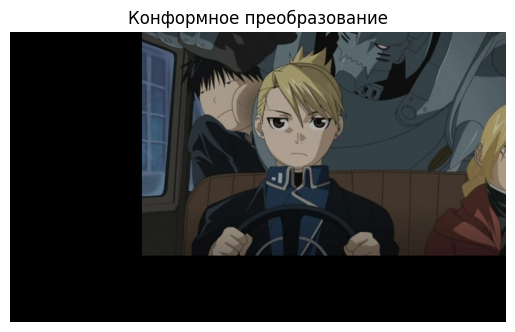

In [3]:
# конформное преобразование
# сдвигает изображение
rows, cols = I.shape[0:2]
T_konf = np.float32([[1, 0, 200], [0, 1, -100]]) # сдвиг по Ox на 200px, по Oy на -100px
I_shift = cv2.warpAffine(I, T_konf, (cols , rows))
plt.imshow(I_shift)
plt.title('Конформное преобразование')
plt.axis('off')
plt.show()

За счёт конформного отображения картинка сдвинулась по Ox на 200px и по Oy на -100px.

Другое аффинное преобразование - отражение изображения.

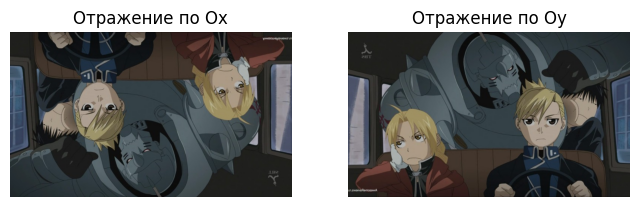

In [4]:
# отражение изображения
Tx = np.float32([[1 , 0,  0], [0, -1, rows - 1]])
I_reflectX = cv2.warpAffine(I, Tx, (cols , rows))

Ty = np.float32([[-1 , 0,  cols - 1], [0, 1, 0]])
I_reflectY = cv2.warpAffine(I, Ty, (cols , rows))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title('Отражение по Ox')
plt.axis('off')
plt.imshow(I_reflectX)

plt.subplot(1, 2, 2)
plt.title('Отражение по Oy')
plt.imshow(I_reflectY)
plt.axis('off')
plt.show()

Проекционное (проективное) отображение — это отображение, при котором прямые линии остаются прямыми линиями, однако геометрия фигуры может быть нарушена, т.к. данное отображение в общем случае не сохраняет параллельности линий.

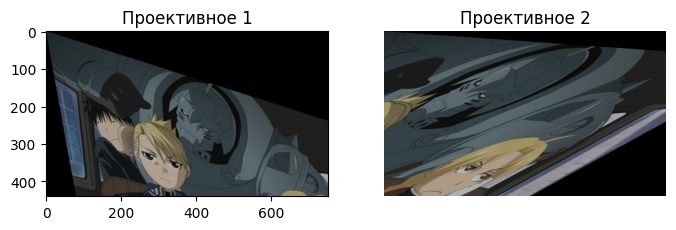

In [5]:
# проективное отображение
T_pr1 = np.float32 ([[1.1 , 0.2 , 0.00075], [0.35 , 1.1 , 0.0005], [0, 0, 1]])
I_projective1 = cv2.warpPerspective(I, T_pr1, (cols , rows ))

T_pr2 = np.float32 ([[1.4 , -2 , 0.3], [0.1 , 1.1 , 0.5], [0, 0, 1]])
I_projective2 = cv2.warpPerspective(I, T_pr2, (cols , rows ))

plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
plt.title('Проективное 1')
plt.imshow(I_projective1)

plt.subplot(1, 2, 2)
plt.title('Проективное 2')
plt.imshow(I_projective2)

plt.axis('off')
plt.show()

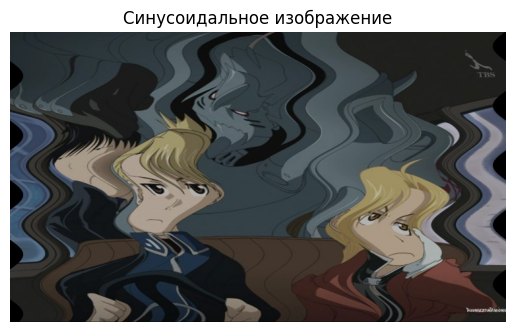

In [6]:
# синусоидальное искажение
u, v = np.meshgrid (np. arange ( cols ), np.arange ( rows ))
u = u + 20 * np.sin (2 * math.pi * v / 90)
I_sinusoid = cv2.remap (I, u. astype (np. float32 ), 
                          v. astype (np. float32 ), cv2. INTER_LINEAR )
plt.imshow(I_sinusoid)
plt.title('Синусоидальное изображение')
plt.axis('off')
plt.show()

**2. Коррекция дисторсии. Выбрать произвольное изображение либо с подушкообразной, либо с бочкообразной дисторсией. Выполнить коррекцию изображения.**

Дисторсия — это оптическое искажение, выражающееся в искривлении прямых линий. Для коррекции дисторсии используется изображение регулярной сетки и его искаженное изображение, находятся пары точек на этих изображениях и вычисляются коэффиценты корректирующего преобразования.

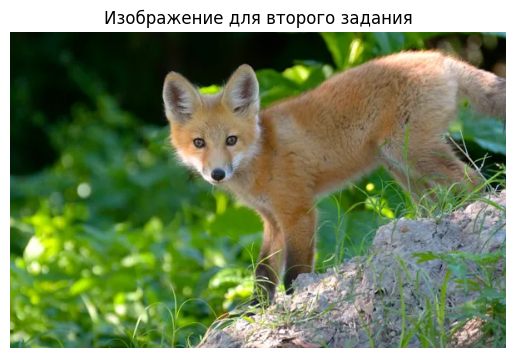

In [7]:
I = cv2.imread("fox.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.title('Изображение для второго задания')
plt.axis('off')
plt.show()

Исказим изображение для получения бочкообразной дисторсии.

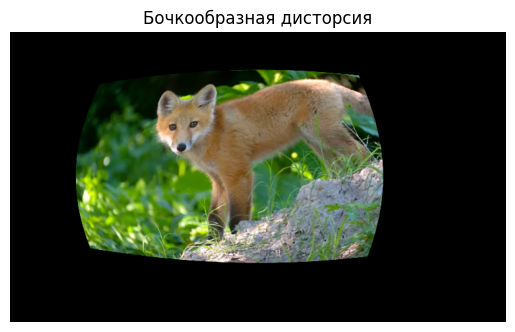

In [8]:
# Create mesh grid for X, Y
xi , yi = np.meshgrid (np. arange ( cols ), np.arange ( rows ))
# Shift and normalize grid
xmid, ymid = cols / 2.0,  rows / 2.0
xi, yi = xi - xmid, yi - ymid
# Convert to polar and do transformation
r, theta = cv2.cartToPolar (xi / xmid , yi / ymid )
F3 = 0.6
F5 = 0.12
r = r + F3 * r ** 3 + F5 * r ** 5
# Undo conversion , normalization and shift
u, v = cv2. polarToCart (r, theta )
u = u * xmid + xmid
v = v * ymid + ymid
# Do remapping
I_barrel = cv2.remap (I, u. astype (np. float32 ), v.astype (np. float32 ), 
                      cv2. INTER_LINEAR )

plt.imshow(I_barrel)
plt.title('Бочкообразная дисторсия')
plt.axis('off')
plt.show()


Теперь приведём изображение обратно к нормальному. Для этого применим подушкообразную дисторсию.

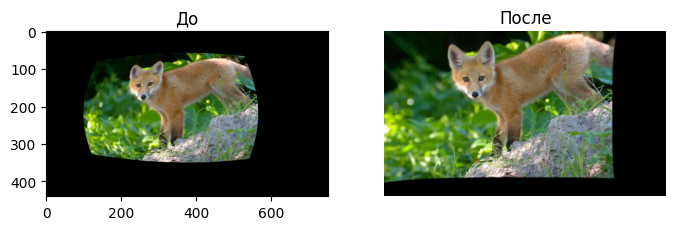

In [9]:
# код для возвращения к нормальному изображению

# Create mesh grid for X, Y
xi , yi = np.meshgrid (np. arange ( cols ), np.arange ( rows ))
# Shift and normalize grid
xmid, ymid = cols / 2.0,  rows / 2.0
xi, yi = xi - xmid, yi - ymid
# Convert to polar and do transformation
r, theta = cv2.cartToPolar (xi / xmid , yi / ymid )
F3 = -0.3 # значение, которое отвечает за изменения
r = r + F3 * r*r # эта формула поменялась
# Undo conversion , normalization and shift
u, v = cv2. polarToCart (r, theta )
u = u * xmid + xmid
v = v * ymid + ymid
# Do remapping
I_back = cv2.remap (I_barrel, u. astype (np. float32 ), v.astype (np. float32 ), 
                      cv2. INTER_LINEAR )

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title('До')
plt.imshow(I_barrel)

plt.subplot(1, 2, 2)
plt.title('После')
plt.imshow(I_back)
plt.axis('off')
plt.show()



**3. «Склейка» изображений. Выбрать два изображения (снимки с фотокамеры, фрагменты сканированного изображения и пр.), на которых имеется область пересечения. Выполнить коррекцию второго изображения для его перевода в систему координат первого; затем выполнить автоматическую «склейку» из двух изображений в одно.**

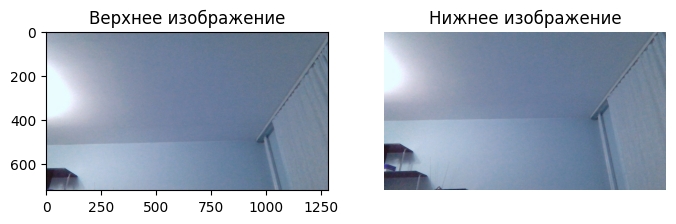

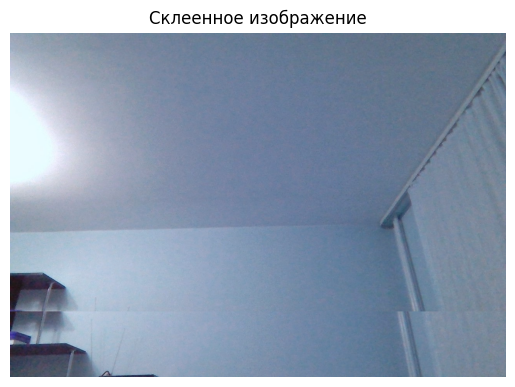

In [10]:
topPart = cv2.imread ("top.jpg", cv2.IMREAD_COLOR)
botPart = cv2.imread ("bottom.jpg", cv2.IMREAD_COLOR)
# Match template
templ_size = 10
templ = topPart [- templ_size :, :, :]
res = cv2.matchTemplate( botPart , templ , cv2.TM_CCOEFF)
# В качестве точки «склейки» выберем точку с максимальным
# значением коэффициента корреляции:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# Построим «склеенное» изображение result_img с границей
# склейки на основе полученного индекса:
result_img = np. zeros ((topPart.shape [0] + 
                         botPart.shape [0] - max_loc[1] - 
                         templ_size, topPart.shape[1] , 
                         topPart.shape[2]) , dtype = np.uint8 )
result_img [0: topPart.shape [0] , :, :] = topPart
result_img [topPart.shape [0]: , :, :] = botPart[ max_loc[1] + templ_size :, :, :]

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title('Верхнее изображение')
plt.imshow(topPart)

plt.subplot(1, 2, 2)
plt.title('Нижнее изображение')
plt.imshow(botPart)
plt.axis('off')
plt.show()

plt.imshow(result_img)
plt.title('Склеенное изображение')
plt.axis('off')
plt.show()

Получилось неплохо, попробуем теперь воспользоваться библиотекой Stitcher.

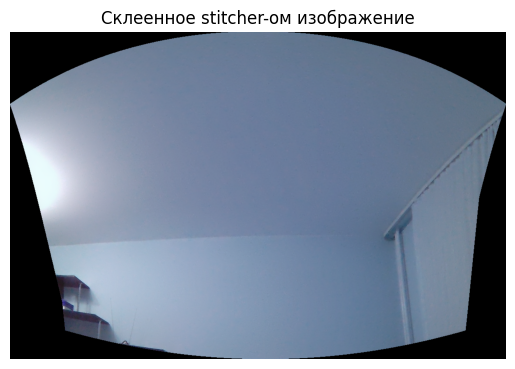

In [11]:
stitcher = cv2.Stitcher.create (cv2.Stitcher_PANORAMA )

# Далее необходимо создать массив исходных изображений для
# «склейки» и передать его в метод stitch():
status, I_stitch = stitcher.stitch ([ topPart, botPart ])
plt.imshow(I_stitch)
plt.title('Склеенное stitcher-ом изображение')
plt.axis('off')
plt.show()

Результат получился очень хороший. 